### Es 1
Hai a disposizione un file `data.csv` contenente dati mensili di passeggeri con due colonne:

- `date`: data in formato `YYYY-MM` (mese/anno)
- `passengers`: numero di passeggeri per quel mese


Costruisci un modello di **regressione polinomiale** che approssima l’andamento del numero di passeggeri nel tempo.

1. Carica il dataset.
2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
3. Applica una regressione polinomiale (grado a tua scelta).
4. Calcola l’RMSE tra i valori reali e quelli predetti.
5. Visualizza i dati reali e la curva stimata con Plotly.

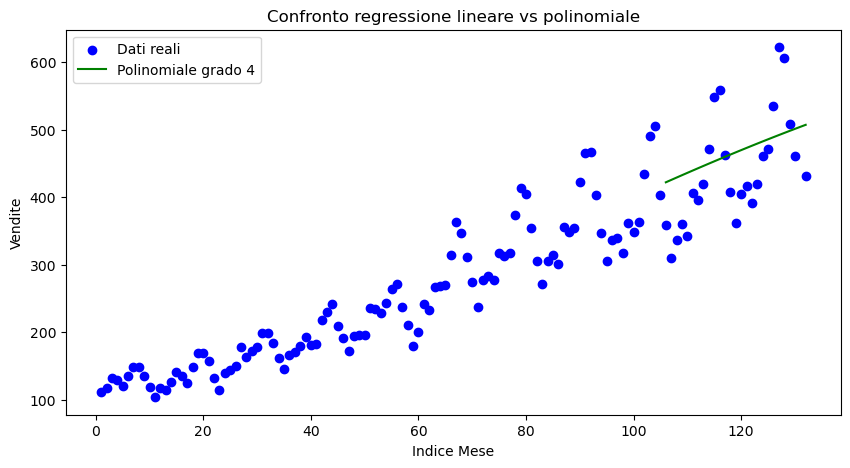

RMSE:  347.22097147758313


In [ ]:
import pandas as pd
import matplotlib.pyplot as plotly
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import root_mean_squared_error

#1,2,3,5)
df = pd.read_csv("data.csv")
numeric_months = pd.Series(range(1, len(df) + 1)).astype("Int64")
passengers = df["passengers"].astype("Int64")

new_df = pd.DataFrame({
    "mese_numerico": numeric_months,
    "passengers": passengers
})

X_train, X_test, y_train, y_test = train_test_split(new_df[["mese_numerico"]], new_df["passengers"], test_size=0.2, shuffle=False)

model = make_pipeline(PolynomialFeatures(4), LinearRegression())
model.fit(X_train, y_train)
prediction = model.predict(X_test)

plotly.figure(figsize=(10, 5))
plotly.scatter(new_df["mese_numerico"], new_df["passengers"], label="Dati reali", color="blue")
plotly.plot(X_test, prediction, label=f"Polinomiale grado 4", color="green")
plotly.xlabel("Mese")
plotly.ylabel("Passegeri")
plotly.legend()
plotly.show()

#4)
print("RMSE:", root_mean_squared_error(X_test, prediction))

### Es2. 
Costruisci una web app con Dash che permette all’utente di scegliere il grado del polinomio per adattare un modello di regressione ai dati non lineari e vedere il risultato aggiornarsi dinamicamente.


1. Genera 100 punti x tra -3 e 3.

2. Calcola ad esempio y = x³ - x + rumore.

3. Costruisci un'interfaccia Dash con:
    - uno slider per scegliere il grado del polinomio (1–10),
    - un grafico Plotly che mostra i dati e la curva stimata.

4. Usa PolynomialFeatures + LinearRegression da scikit-learn per stimare la curva

In [4]:
import random as rd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import plotly.graph_objects as go

#1,2)
data = [rd.uniform(-3, 3) for _ in range(100)]
y = [x**3 - x + rd.gauss(0, 0.2) for x in data]

X = np.array(data).reshape(-1, 1)
y = np.array(y)

#3,4)
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H3("Seleziona un esponente", style={"color": "white"}),

    dcc.Slider(
        id="slider",
        min=1,
        max=10,
        step=1,
        value=3,
        marks={i: str(i) for i in range(1, 11)}
    ),

    dcc.Graph(id="graph"),

    html.Div(id="output", style={"color": "white", "marginTop": "20px"})
], style={"backgroundColor": "#111", "padding": "20px"})


@app.callback(
    [Output("graph", "figure"),
     Output("output", "children")],
    Input("slider", "value")
)

def update_plot(degree):
    # Train model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    
    # Sort the data for smooth plotting
    sorted_indices = np.argsort(data)
    X_sorted = X[sorted_indices]
    y_sorted = y[sorted_indices]
    y_pred_sorted = model.predict(X_sorted)

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=X_sorted.flatten(), y=y_sorted, mode="markers", name="Dati reali", marker=dict(color="blue")))
    fig.add_trace(go.Scatter(x=X_sorted.flatten(), y=y_pred_sorted, mode="lines", name=f"Polinomio grado {degree}", line=dict(color="red")))


    fig.update_layout(
        title=f"Regressione Polinomiale (grado {degree})",
        plot_bgcolor="#222",
        paper_bgcolor="#111",
        font=dict(color="white"),
        height=500
    )

    return fig, f"Grado selezionato: {degree}"


if __name__ == "__main__":
    app.run_server(debug=True)
